WFIGS Dataset Analysis and Visualization

In [1]:
# import necessery libraries
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly_express as px

In [2]:
# load data
data = pd.read_csv("WFIGS_-_Wildland_Fire_Locations_Full_History.csv")
data = data[['UniqueFireIdentifier','FireDiscoveryDateTime','POOState','POOCounty','FireCause','FireCauseGeneral','DailyAcres','DiscoveryAcres','InitialLatitude','InitialLongitude']]
data.head()

/var/folders/qy/3rw6vnbs5j7dxjy7txkb9cgm0000gn/T/ipykernel_26253/1435304901.py:2: DtypeWarning: Columns (13,32,61,64,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("WFIGS_-_Wildland_Fire_Locations_Full_History.csv")


,UniqueFireIdentifier,FireDiscoveryDateTime,POOState,POOCounty,FireCause,FireCauseGeneral,DailyAcres,DiscoveryAcres,InitialLatitude,InitialLongitude
0,2020-MTLG42-000224,2020/08/06 18:58:00+00,US-MT,Carter,Human,Equipment,50.6,20.0,45.78496,-104.4958
1,2020-CALAC-066100,2020/02/28 20:45:40+00,US-CA,Los Angeles,Unknown,NaN,NaN,0.1,33.80898,-118.1807
2,2017-MTNWS-000878,2017/10/17 20:20:24+00,US-MT,Flathead,Human,NaN,50.0,50.0,48.07167,-114.8303
3,2019-CAMVU-009269,2019/07/01 19:54:00+00,US-CA,San Diego,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-CANEU-014375,2016/06/20 22:05:59+00,US-CA,Placer,NaN,NaN,NaN,NaN,NaN,NaN


Basic Data explore

In [3]:
df = data[data['POOState'].str.match('US-')]
df = df.sort_values(by='FireDiscoveryDateTime')
df

,UniqueFireIdentifier,FireDiscoveryDateTime,POOState,POOCounty,FireCause,FireCauseGeneral,DailyAcres,DiscoveryAcres,InitialLatitude,InitialLongitude
86653,2003-WYCMX-200237,2003/01/01 06:59:59+00,US-WY,Campbell,NaN,NaN,NaN,NaN,NaN,NaN
147784,2004-CABDU-006784,2004/07/06 01:04:00+00,US-CA,San Bernardino,NaN,NaN,NaN,NaN,NaN,NaN
124012,2008-IDGBK-000002,2008/07/22 15:10:00+00,US-ID,Ada,NaN,NaN,NaN,NaN,NaN,NaN
147748,2008-IDCTF-008902,2008/09/08 13:34:59+00,US-ID,Bear Lake,Unknown,NaN,20.0,1.0,42.103889,-111.547778
99688,2008-AZPNF-000975,2008/10/07 18:16:00+00,US-AZ,Yavapai,Unknown,NaN,NaN,NaN,34.389999,-112.080002
...,...,...,...,...,...,...,...,...,...,...
211531,2022-CARRU-038466,2022/03/14 18:52:38+00,US-CA,Riverside,Undetermined,NaN,NaN,0.1,33.691797,-117.225950
211533,2022-TXTXS-221624,2022/03/14 18:52:51+00,US-TX,Coryell,Undetermined,Undetermined,10.0,30.0,31.189829,-97.951463
211535,2022-TXTXS-221625,2022/03/14 19:39:15+00,US-TX,Cass,Undetermined,Undetermined,5.0,5.0,33.021967,-94.564750
211532,2022-CATCU-003307,2022/03/14 19:46:52+00,US-CA,Calaveras,Undetermined,NaN,NaN,0.1,38.404329,-120.454859


In [4]:
import datetime as dt 

# split year, date and time from 'FireDiscoveryDateTime' column

df['Year'] = pd.to_datetime(df['FireDiscoveryDateTime']).dt.year
df['Date'] = pd.to_datetime(df['FireDiscoveryDateTime']).dt.date
df['Time'] = pd.to_datetime(df['FireDiscoveryDateTime']).dt.time

df

,UniqueFireIdentifier,FireDiscoveryDateTime,POOState,POOCounty,FireCause,FireCauseGeneral,DailyAcres,DiscoveryAcres,InitialLatitude,InitialLongitude,Year,Date,Time
86653,2003-WYCMX-200237,2003/01/01 06:59:59+00,US-WY,Campbell,NaN,NaN,NaN,NaN,NaN,NaN,2003,2003-01-01,06:59:59
147784,2004-CABDU-006784,2004/07/06 01:04:00+00,US-CA,San Bernardino,NaN,NaN,NaN,NaN,NaN,NaN,2004,2004-07-06,01:04:00
124012,2008-IDGBK-000002,2008/07/22 15:10:00+00,US-ID,Ada,NaN,NaN,NaN,NaN,NaN,NaN,2008,2008-07-22,15:10:00
147748,2008-IDCTF-008902,2008/09/08 13:34:59+00,US-ID,Bear Lake,Unknown,NaN,20.0,1.0,42.103889,-111.547778,2008,2008-09-08,13:34:59
99688,2008-AZPNF-000975,2008/10/07 18:16:00+00,US-AZ,Yavapai,Unknown,NaN,NaN,NaN,34.389999,-112.080002,2008,2008-10-07,18:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211531,2022-CARRU-038466,2022/03/14 18:52:38+00,US-CA,Riverside,Undetermined,NaN,NaN,0.1,33.691797,-117.225950,2022,2022-03-14,18:52:38
211533,2022-TXTXS-221624,2022/03/14 18:52:51+00,US-TX,Coryell,Undetermined,Undetermined,10.0,30.0,31.189829,-97.951463,2022,2022-03-14,18:52:51
211535,2022-TXTXS-221625,2022/03/14 19:39:15+00,US-TX,Cass,Undetermined,Undetermined,5.0,5.0,33.021967,-94.564750,2022,2022-03-14,19:39:15
211532,2022-CATCU-003307,2022/03/14 19:46:52+00,US-CA,Calaveras,Undetermined,NaN,NaN,0.1,38.404329,-120.454859,2022,2022-03-14,19:46:52


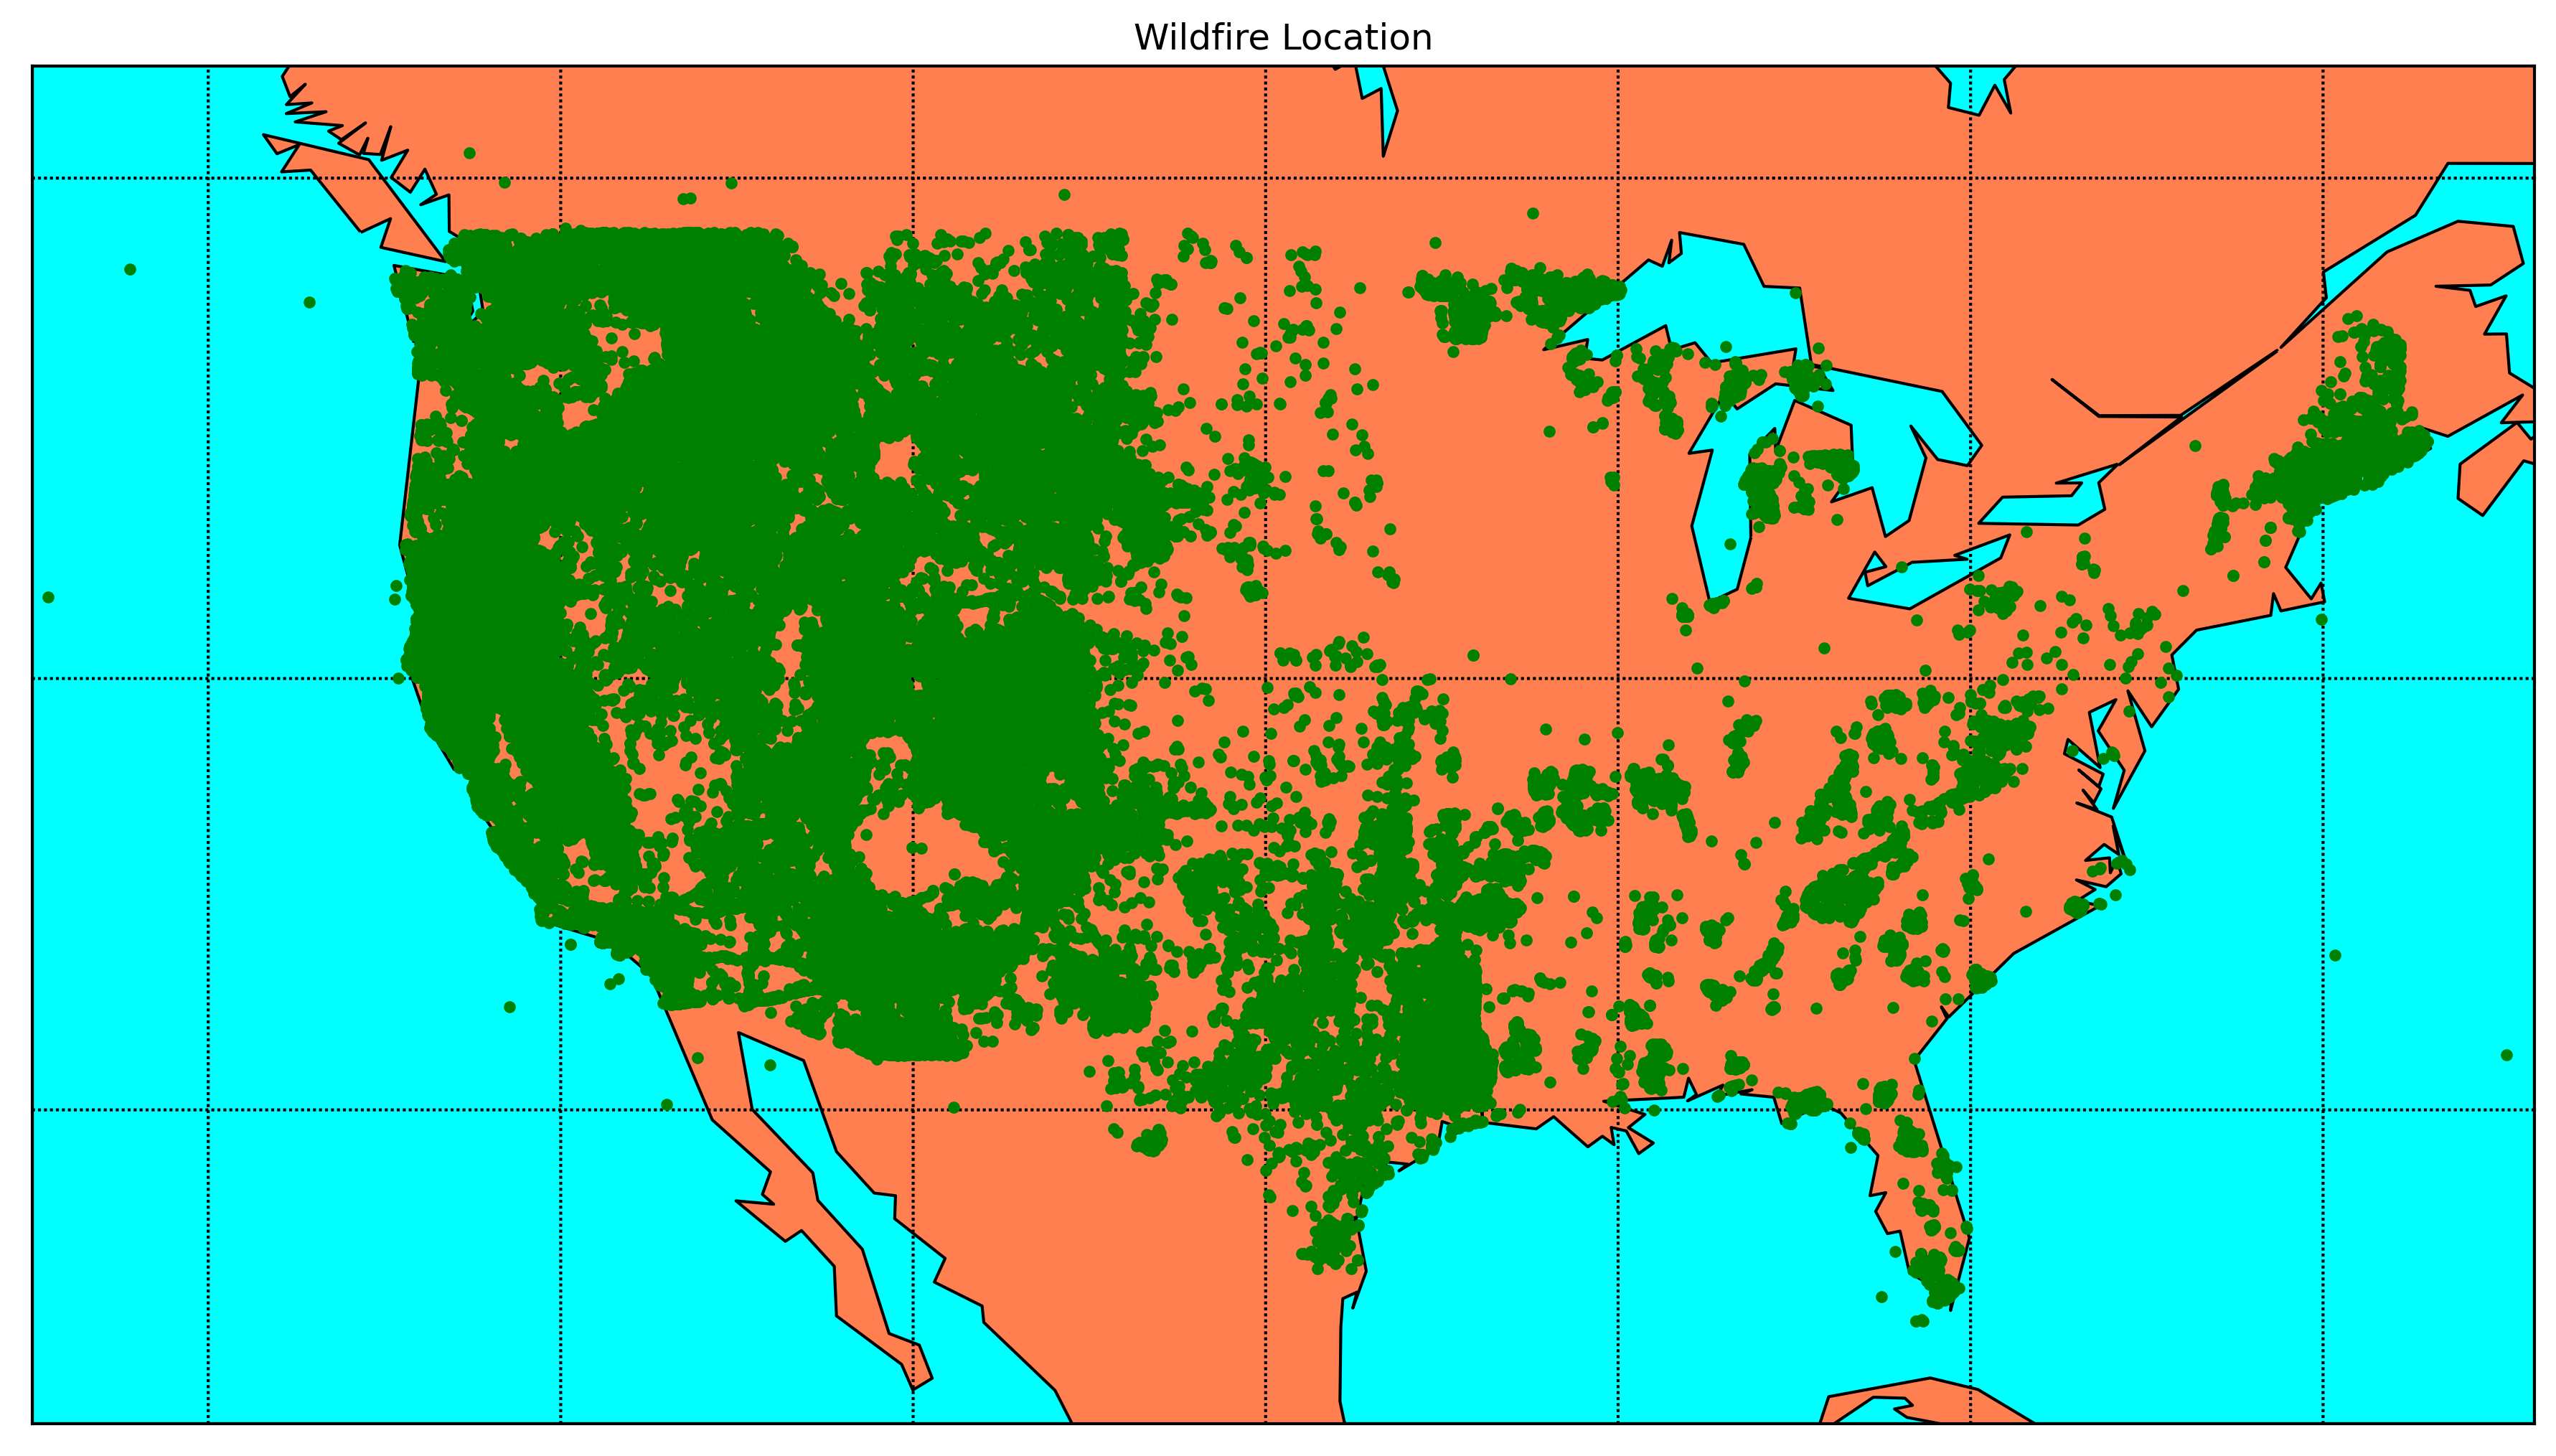

In [5]:
# plot wildfire location 
def draw_wildfire_location():
    plt.figure(figsize=(15,10),dpi=300)
    m = Basemap(llcrnrlon=-135,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=52,projection='merc',lat_1=33,lat_2=45,lon_0=-95)
    
    m.drawcoastlines()
    m.fillcontinents(color='coral',lake_color='aqua')
    m.drawparallels(np.arange(-90., 91., 10.))
    m.drawmeridians(np.arange(-180., 181., 10.))
    m.drawmapboundary(fill_color='aqua')

    x , y = m(np.array(df['InitialLongitude']), np.array(df['InitialLatitude']))
    m.plot(x,y,'g.')

    plt.title('Wildfire Location')
    plt.show()
    
draw_wildfire_location()

In [6]:
df.groupby(['Year']).count()["UniqueFireIdentifier"]

Year
2003        1
2004        1
2008        3
2009       18
2010        7
2011       20
2012        4
2013       16
2014    12672
2015    19794
2016    20243
2017    25676
2018    23956
2019    29235
2020    35680
2021    39532
2022     4644
Name: UniqueFireIdentifier, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Fires Recorded in Recent Ten Years')

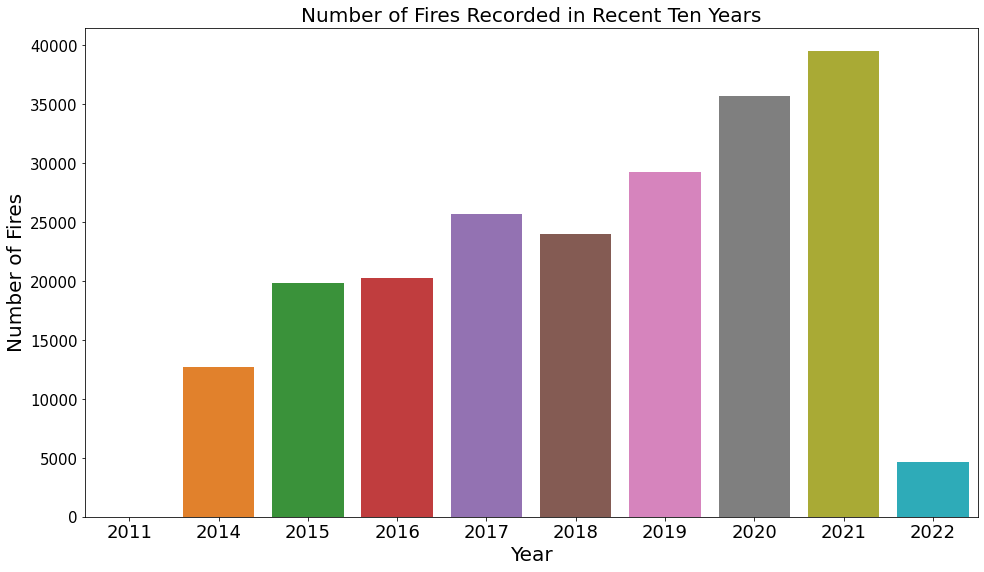

In [8]:
# find most # of fires for recent ten years
fire_count = df.groupby(['Year']).count()["UniqueFireIdentifier"].reset_index(name="# of Fires")
sorted_fire_count = fire_count.sort_values(by="# of Fires", ascending = False)
recent_ten_years = sorted_fire_count[:10]
count = recent_ten_years["# of Fires"]
years = recent_ten_years["Year"]

# plot most # of fires for recent ten years
plt.figure(figsize=(16, 9))
sns.barplot(years, count)
plt.xlabel("Year", size="20")
plt.xticks(size="18")
plt.ylabel("Number of Fires", size="20")
plt.yticks(size="15")
plt.title("Number of Fires Recorded in Recent Ten Years", size="20")

Text(0.5, 1.0, 'Number of Fires Recorded in the Top Ten States')

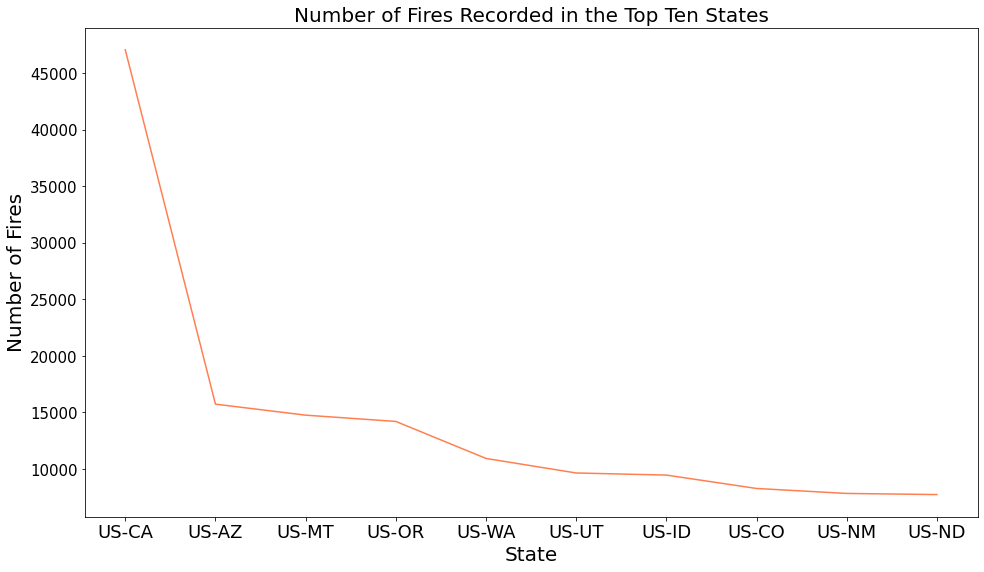

In [9]:
# find states with highest # of fires for all years
state_count = data.groupby(['POOState']).count()["FireDiscoveryDateTime"].reset_index(name="# of Fires")
sorted_state_count = state_count.sort_values(by="# of Fires", ascending = False)
top_ten_states = sorted_state_count[:10]
count = top_ten_states["# of Fires"]
states = top_ten_states["POOState"]

# plot states with highest # of fires for all years
plt.figure(figsize=(16, 9))
plt.plot(states, count, color="coral")
plt.xlabel("State", size="20")
plt.xticks(size="18")
plt.ylabel("Number of Fires", size="20")
plt.yticks(size="15")
plt.title("Number of Fires Recorded in the Top Ten States", size="20")

In [10]:
print(df['FireCauseGeneral'].value_counts()[0]/len(df))

0.048623653677033786


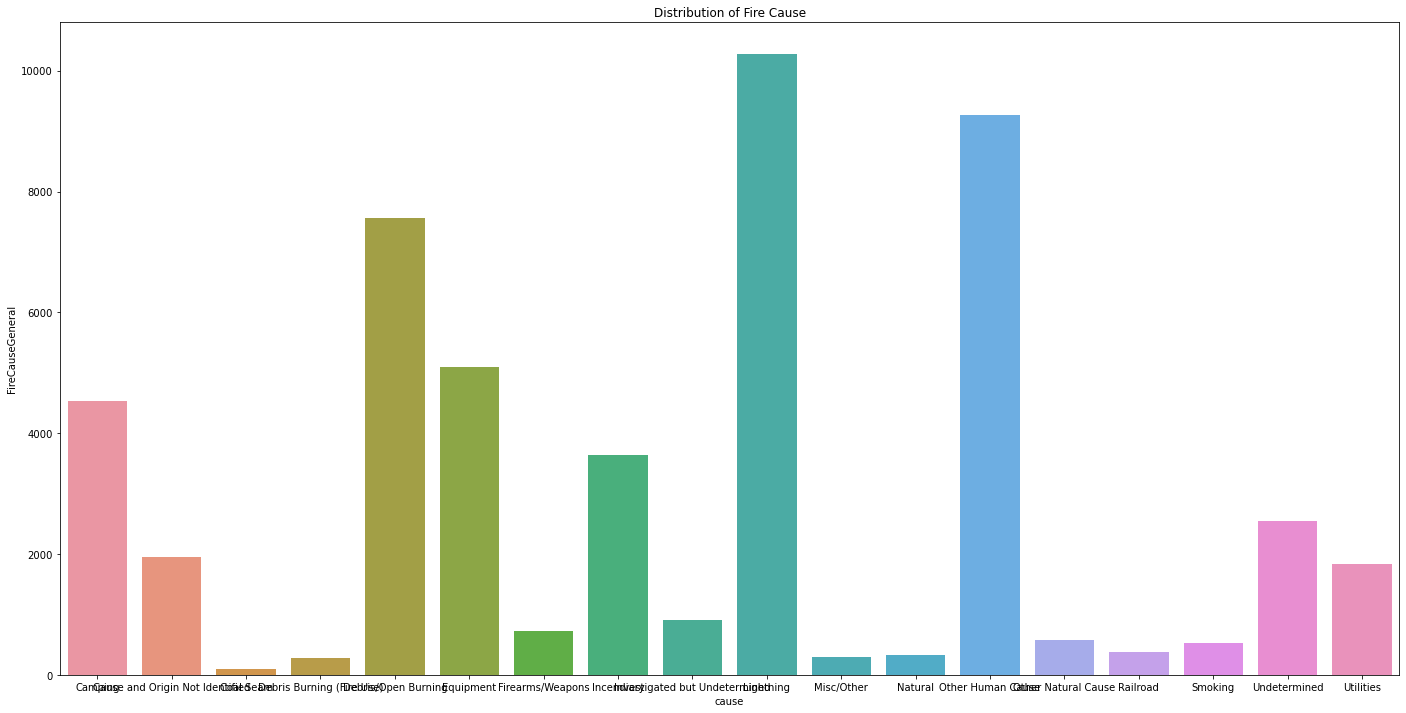

In [11]:
# plot fire cause general
plt.figure(figsize=(24,12))
fire_cause_dist = pd.DataFrame(data["FireCauseGeneral"].value_counts()).sort_index()
fire_cause_dist["cause"] = fire_cause_dist.index
_=sns.barplot(data=fire_cause_dist, x="cause", y="FireCauseGeneral")
_=plt.title("Distribution of Fire Cause")

In [12]:
# number of records

print("fire count:",df.shape[0])
print("fire county count:",df["POOCounty"].nunique())
print("fire state count:",df["POOState"].nunique())
print("fire cause count:",df["FireCause"].nunique())
print("fire cause general count:",df["FireCauseGeneral"].nunique())

fire count: 211502
fire county count: 1442
fire state count: 52
fire cause count: 4
fire cause general count: 18


In [13]:
df['FireCause'].value_counts()

Human           79198
Natural         42678
Unknown         34278
Undetermined    28856
Name: FireCause, dtype: int64

In [14]:
fire_count = df.groupby(['FireCause','FireCauseGeneral'])['FireCauseGeneral'].count().to_frame()
fire_count

FireCauseGeneral
FireCause FireCauseGeneral                                 
Human     Camping                                      4443
          Cause and Origin Not Identified                61
          Coal Seam                                      20
          Debris Burning (Fire Use)                     233
          Debris/Open Burning                          7099
...                                                     ...
Unknown   Other Human Cause                             577
          Other Natural Cause                           107
          Railroad                                       39
          Smoking                                        36
          Utilities                                      70

[62 rows x 1 columns]

In [15]:
# fire distribution by firecause and region

region_fire_count=df.pivot_table(index="POOState",
                 columns=["FireCause"],
                 values="UniqueFireIdentifier",
                 aggfunc="count",
                 margins=True)

# displaying all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

region_fire_count

FireCause,Human,Natural,Undetermined,Unknown,All
POOState,,,,,
US-AK,2104.0,1658.0,110.0,85.0,3957
US-AL,306.0,18.0,196.0,452.0,972
US-AR,513.0,44.0,305.0,523.0,1385
US-AZ,8831.0,4469.0,1244.0,741.0,15285
US-CA,4311.0,3578.0,14216.0,17904.0,40009
US-CO,2480.0,4065.0,546.0,857.0,7948
US-CT,2.0,1.0,NaN,NaN,3
US-DC,10.0,NaN,1.0,1.0,12
US-DE,1.0,NaN,NaN,NaN,1


Comment#1：

This table counts the number of fire cause that occur by state. Which state and which fire cause occur more

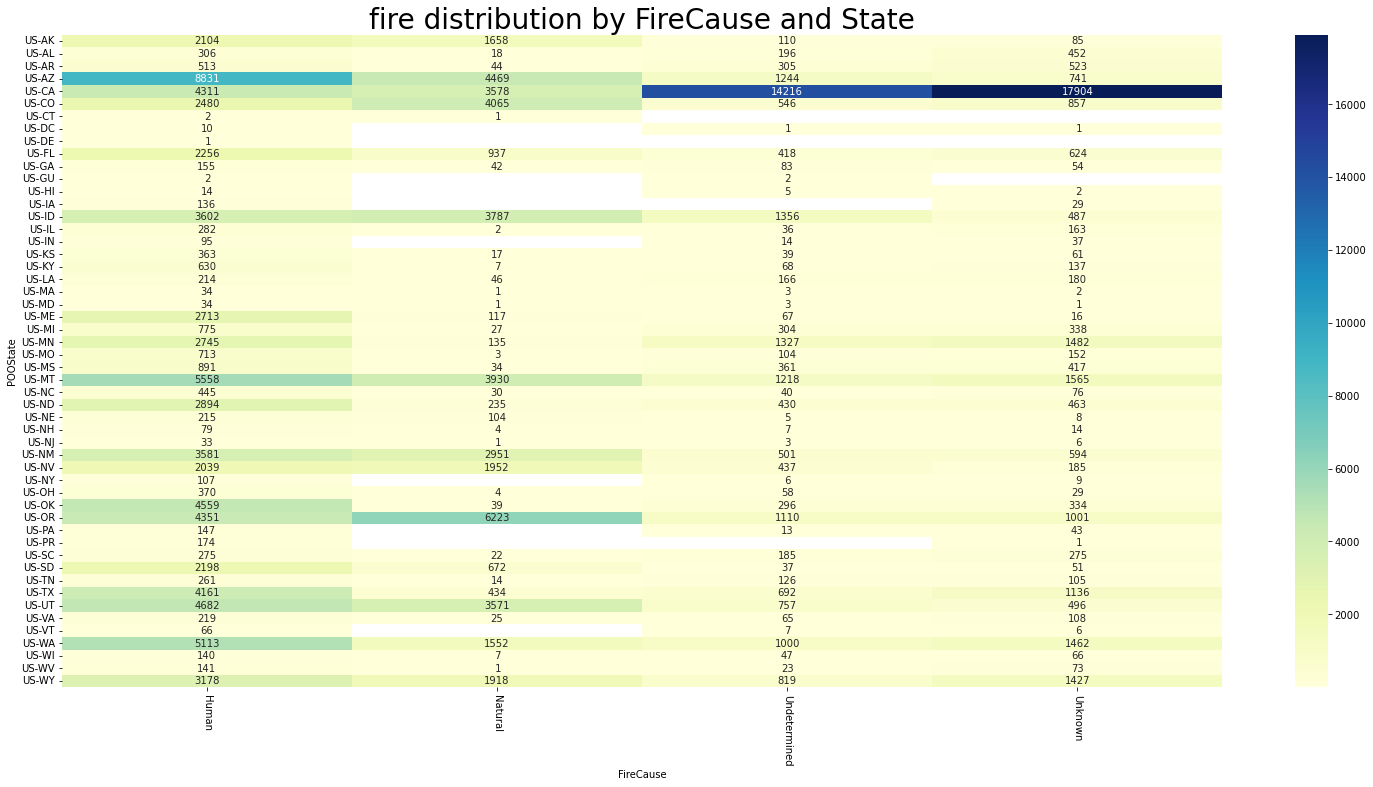

In [16]:
plt.figure(figsize=(26,12))
region_fire_count2=df.pivot_table(index="POOState",
                 columns=["FireCause"],
                 values="UniqueFireIdentifier",
                 aggfunc="count",
                 margins=False)

_=sns.heatmap(region_fire_count2, 
            cmap="YlGnBu",
            annot=True,
              fmt='2g')
_=plt.xticks(rotation=-90)
_=plt.title("fire distribution by FireCause and State",fontsize=28)

Comment#2:

To visualize the values from the previous statistics table, the darker the color, the more times the firecause occurred

In [17]:
# DiscoveryAcres distribution by firecause and state

region_acres_count=df.pivot_table(index="POOState",
                 columns=["FireCause"],
                 values="DiscoveryAcres",
                 aggfunc="sum",
                 margins=True)
region_acres_count

FireCause,Human,Natural,Undetermined,Unknown,All
POOState,,,,,
US-AK,1.074225e+04,115161.800,997.500,1221.00,1.281226e+05
US-AL,2.684650e+03,11.100,16210.200,82705.80,1.016118e+05
US-AR,2.511620e+03,331.600,6916.700,7390.10,1.715002e+04
US-AZ,1.527414e+04,8743.390,8764.880,15772.40,4.855481e+04
US-CA,6.229020e+03,13858.210,70884.450,164929.70,2.559014e+05
US-CO,1.799552e+04,8929.060,7773.500,2741.70,3.743978e+04
US-CT,0.000000e+00,0.000,NaN,NaN,NaN
US-DC,2.600000e+00,NaN,0.500,0.00,3.100000e+00
US-DE,3.000000e+01,NaN,NaN,NaN,3.000000e+01


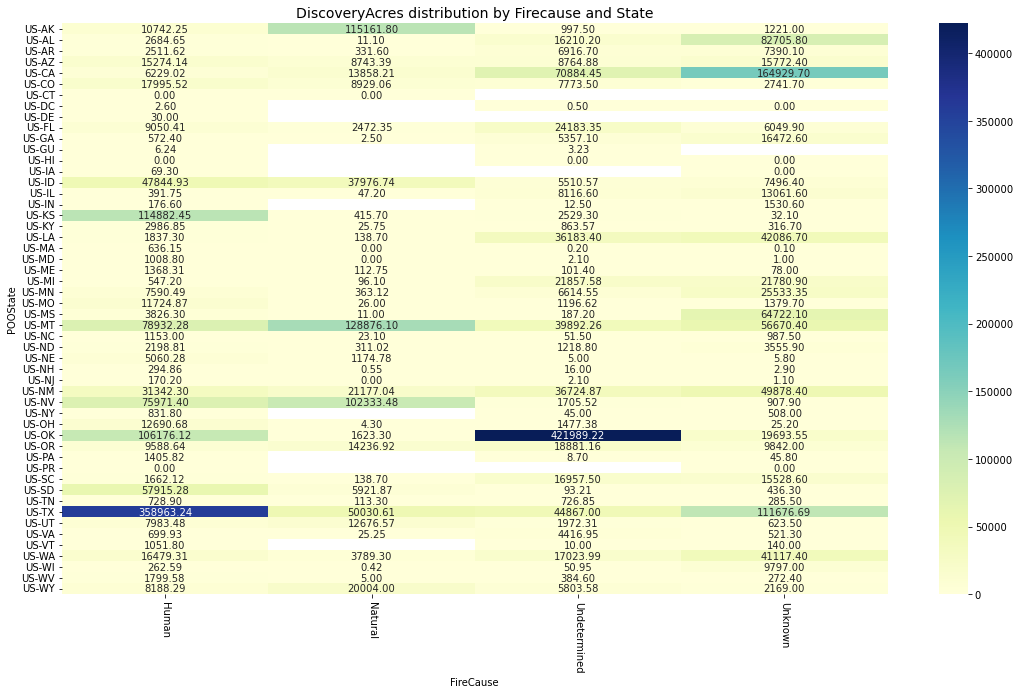

In [18]:
plt.figure(figsize=(18.5,10.5))

region_acres_count2=df.pivot_table(index="POOState",
                 columns=["FireCause"],
                 values="DiscoveryAcres",
                 aggfunc="sum",
                 margins=False)

_=sns.heatmap(region_acres_count2, 
            cmap="YlGnBu",
            annot=True,
              fmt='.2f')
_=plt.xticks(rotation=-90)
_=plt.title("DiscoveryAcres distribution by Firecause and State",fontsize=14)

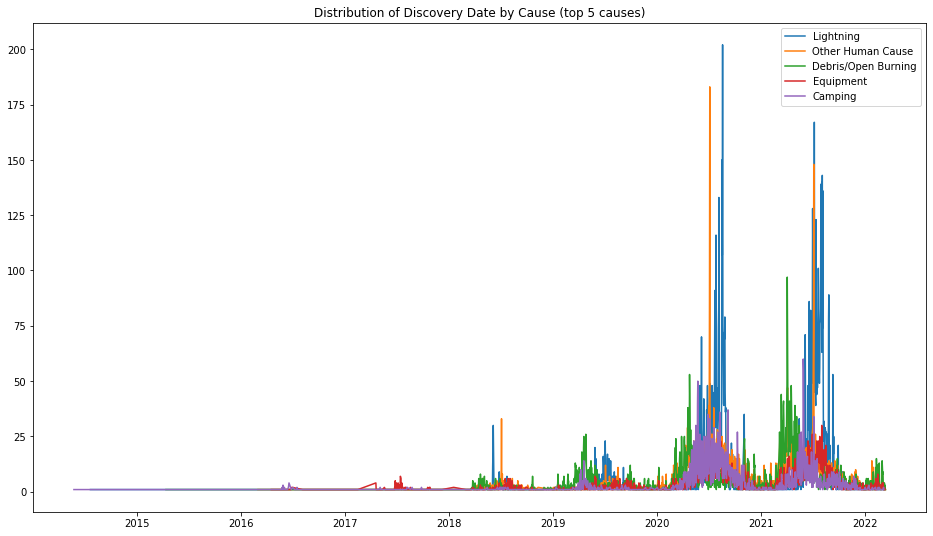

In [19]:
plt.figure(figsize=(16,9))

def plot_freq_by_cause(cause):
    doy_df = df.loc[data["FireCauseGeneral"] == cause, "Date"]
    _=plt.plot(doy_df.value_counts().sort_index(), label=cause)
    _=plt.legend()
    
for cause in df["FireCauseGeneral"].value_counts().index[0:5]:
    _=plot_freq_by_cause(cause)
    
_=plt.title("Distribution of Discovery Date by Cause (top 5 causes)")

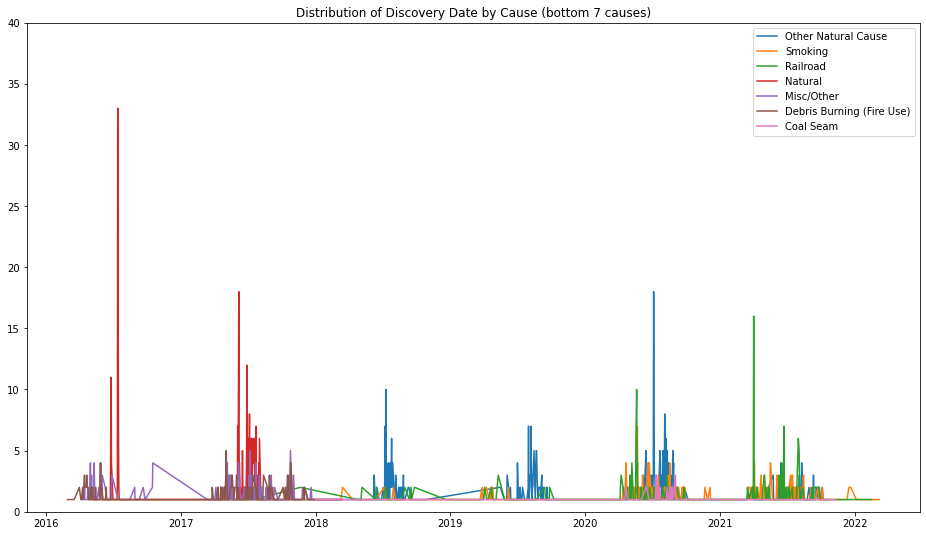

In [20]:
plt.figure(figsize=(16,9))
for cause in df["FireCauseGeneral"].value_counts().index[11:]:
    _=plot_freq_by_cause(cause)
    
_=plt.ylim([0,40])
_=plt.title("Distribution of Discovery Date by Cause (bottom 7 causes)")

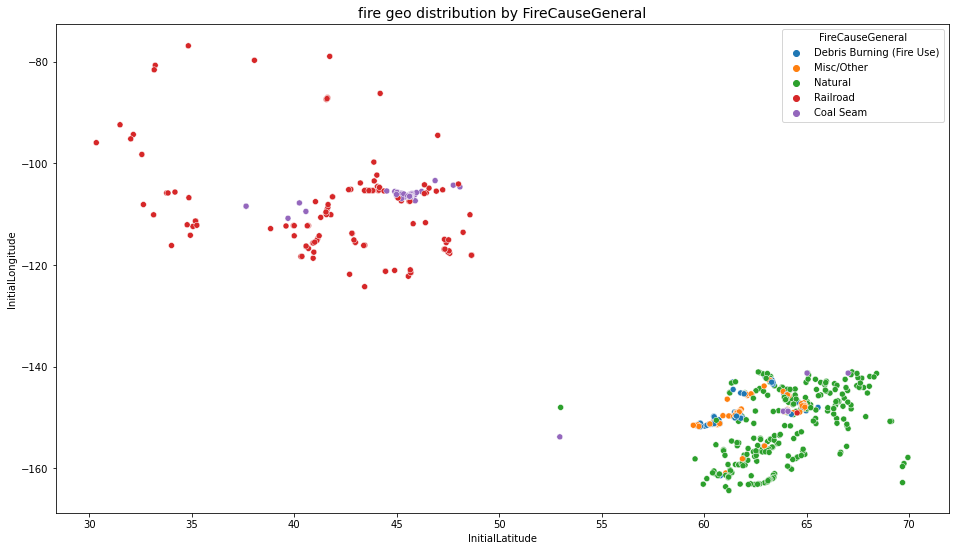

In [21]:
# fire type distribution by geo
plt.figure(figsize=(16,9))
bottom_five = df.FireCauseGeneral.isin(df["FireCauseGeneral"].value_counts().index[13:])
fire_bottom_causes = df[bottom_five]

_=sns.scatterplot(data=fire_bottom_causes,
                  x="InitialLatitude",
                  y="InitialLongitude",
                  hue="FireCauseGeneral",
                  )
_=plt.title("fire geo distribution by FireCauseGeneral",fontsize=14)

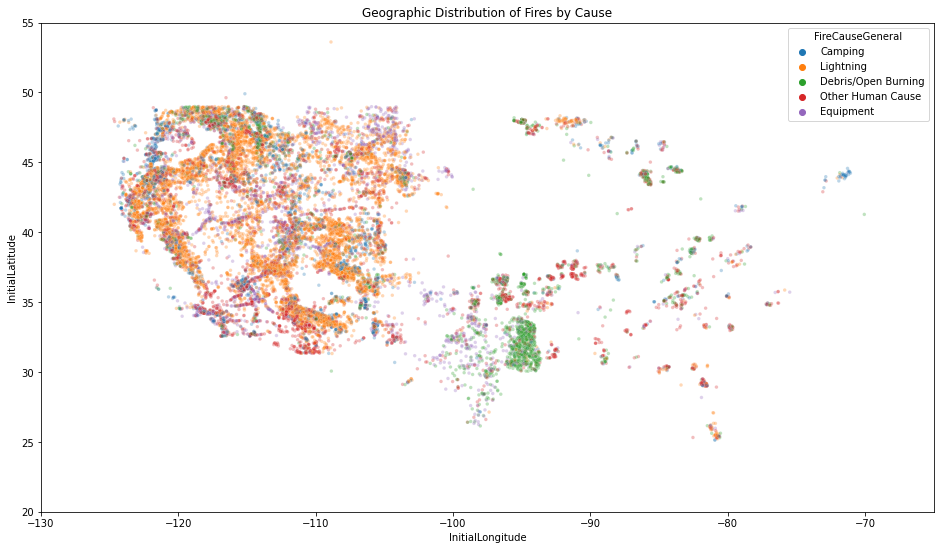

In [22]:
# plot where the top five fire cause occured
plt.figure(figsize=(16,9))
top_five = df.FireCauseGeneral.isin(df["FireCauseGeneral"].value_counts().index[0:5])
fire_top_causes = df[top_five]

_=sns.scatterplot(data=fire_top_causes, 
                  y="InitialLatitude", x="InitialLongitude", hue="FireCauseGeneral",
                  s=12, alpha=.3)
_=plt.xlim((-130,-65))
_=plt.ylim((20,55))
_=plt.title("Geographic Distribution of Fires by Cause")

In [ ]:
#calculate interquartile range of values in the 'DiscoveryAcres' column
#Q1 = df['DiscoveryAcres'].quantile(0.25)
Q1 = np.percentile(df['DiscoveryAcres'], 25)
#Q3 = df['DiscoveryAcres'].quantile(0.75)
#median = df['DiscoveryAcres'].quantile(0.5)

print('Q1 of the given data is ', Q1)
#print('Q3 of the given data is ', Q3)
#print('median of the given data is ', median)

#IQR = Q3 - Q1
#print(IQR)

In [ ]:
#finding the upper and lower limit of the df

inner_range_lower = Q1 - 1.5 * IQR
inner_range_upper = Q3 + 1.5 * IQR
outer_range_lower = Q1 - 3.0 * IQR
outer_range_upper = Q3 + 3.0 * IQR
print('inner low_limit is', inner_range_lower)
print('inner up_limit is', inner_range_upper)
print('outer low_limit is', outer_range_lower)
print('outer up_limit is', outer_range_upper)

In [ ]:
# plot 4 more lines for the inner and outer ranges.

#n = df['DiscoveryAcres']
#normal_sample = np.random.normal(df['DiscoveryAcres'])
plt.hist(df['DiscoveryAcres'], 100)

plt.axvline(df['DiscoveryAcres'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.axvline(inner_range_lower, color='r', linestyle='solid', linewidth=1)
plt.axvline(inner_range_upper, color='r', linestyle='solid', linewidth=1)

plt.axvline(outer_range_lower, color='r', linestyle='dashed', linewidth=1)
plt.axvline(outer_range_upper, color='r', linestyle='dashed', linewidth=1)

plt.rcParams["figure.figsize"] =(12,9)

#sns.distplot(df['DiscoveryAcres'].binomial(n=10, p=0.5, size=1000), hist=True, kde=True)
#sns.boxplot(x2=df['DailyAcres'])
#plt.bar(inner_range_upper, 4)
#plt.bar(outer_range_lower, 4)
#plt.bar(outer_range_upper, 4)

In [ ]:
#sns.regplot(x="DailyAcres", y="DiscoveryAcres", data=df)
#plt.show()

In [ ]:
#sns.pairplot(df, height=3, diag_kind="hist",vars=["Year", "UniqueFireIdentifier"], hue="FireCause")
#plt.show()

In [ ]:

#px.scatter_mapbox(df, lat="InitialLatitude", lon="InitialLongitude", zoom=10)